In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

FILE = 'data/dataset.csv'
df = pd.read_csv(FILE,sep=',')
Inputs = df['Inputs']
Directions = df['Directions'].values
Energy = df['Energy'].values
df.head()

,Inputs,Directions,Energy
0,HHHHP,SRRRL,1
1,HHHHP,SRRRF,1
2,HHHHP,SRLLR,1
3,HHHHP,SRLLF,1
4,HHHHP,SLRRL,1


In [3]:
dic = {}
for i,input in enumerate(Inputs):
    try:
        dic[input].append([Directions[i],Energy[i]])
    except:
        dic[input] = [[Directions[i],Energy[i]]]

data = {}

for key in dic.keys():
    max_energy = 0
    for _,energy in dic[key]:
        if max_energy < energy: 
            max_energy = energy
    data[key] = {'energy':max_energy,'directions':[]}

values = []

for key in dic.keys():
    for dir,energy in dic[key]:
        if energy == data[key]['energy']:
            data[key]['directions'].append(dir)
            values.append([key,dir])

In [70]:
vals = pd.DataFrame(values,columns=['Inputs','Directions'])
vals.head()

,Inputs,Directions
0,HHHHP,SRRRL
1,HHHHP,SRRRF
2,HHHHP,SRLLR
3,HHHHP,SRLLF
4,HHHHP,SLRRL


In [112]:
def make_tuples_v2(line):
    res = [(line['Inputs'][0],line['Inputs'][1],str(0),line['Directions'][1])]
    for i,input in enumerate(line['Inputs'][1:-1]):
        res.append((line['Inputs'][i+1],line['Inputs'][i+2],str(i+1),line['Directions'][i+2]))
    return res

def make_tuples(line):
    res = [('_',line['Inputs'][0],line['Inputs'][1],line['Directions'][1])]
    for i,input in enumerate(line['Inputs'][1:-1]):
        res.append((line['Inputs'][i],input,line['Inputs'][i+2],line['Directions'][i+2]))
    return res

combinations = vals.apply(make_tuples,axis=1)
combinations[0]

combinations_v2 = vals.apply(make_tuples_v2,axis=1)
combinations_v2[0]


[('H', 'H', '0', 'R'),
 ('H', 'H', '1', 'R'),
 ('H', 'H', '2', 'R'),
 ('H', 'P', '3', 'L')]

In [113]:
def tuple2string(t):
    s = ''
    for v in t:
        s += v
    return s

INSTRUCTIONS = []
for c in combinations.apply(lambda x: [tuple2string(v) for v in x]):
    INSTRUCTIONS += c

combinations_v2 = combinations_v2.apply(lambda x: [tuple2string(v) for v in x])
combinations_v2 = combinations_v2.values.tolist()

values = []
for v in combinations_v2:
  values += v

values


['HH0R',
 'HH1R',
 'HH2R',
 'HP3L',
 'HH0R',
 'HH1R',
 'HH2R',
 'HP3F',
 'HH0R',
 'HH1L',
 'HH2L',
 'HP3R',
 'HH0R',
 'HH1L',
 'HH2L',
 'HP3F',
 'HH0L',
 'HH1R',
 'HH2R',
 'HP3L',
 'HH0L',
 'HH1R',
 'HH2R',
 'HP3F',
 'HH0L',
 'HH1L',
 'HH2L',
 'HP3R',
 'HH0L',
 'HH1L',
 'HH2L',
 'HP3F',
 'HH0F',
 'HH1R',
 'HH2R',
 'HP3L',
 'HH0F',
 'HH1R',
 'HH2R',
 'HP3F',
 'HH0F',
 'HH1L',
 'HH2L',
 'HP3R',
 'HH0F',
 'HH1L',
 'HH2L',
 'HP3F',
 'HH0R',
 'HH1R',
 'HP2L',
 'PH3L',
 'HH0R',
 'HH1L',
 'HP2R',
 'PH3R',
 'HH0R',
 'HH1F',
 'HP2R',
 'PH3R',
 'HH0R',
 'HH1F',
 'HP2L',
 'PH3L',
 'HH0L',
 'HH1R',
 'HP2L',
 'PH3L',
 'HH0L',
 'HH1L',
 'HP2R',
 'PH3R',
 'HH0L',
 'HH1F',
 'HP2R',
 'PH3R',
 'HH0L',
 'HH1F',
 'HP2L',
 'PH3L',
 'HH0F',
 'HH1R',
 'HP2L',
 'PH3L',
 'HH0F',
 'HH1L',
 'HP2R',
 'PH3R',
 'HH0F',
 'HH1F',
 'HP2R',
 'PH3R',
 'HH0F',
 'HH1F',
 'HP2L',
 'PH3L',
 'HH0R',
 'HP1R',
 'PH2R',
 'HH3L',
 'HH0R',
 'HP1R',
 'PH2R',
 'HH3F',
 'HH0R',
 'HP1R',
 'PH2L',
 'HH3L',
 'HH0R',
 'HP1L',
 'PH2R',
 

In [117]:
def lists_by_positions(values):
    list_0 = []
    list_1 = []
    list_2 = []
    list_3 = []
    list_4 = []
    list_5 = []
    list_6 = []
    for i in values:
        if (i[2] == "0"):
            list_0.append(i)
        if (i[2] == "1"):
            list_1.append(i)
        if (i[2] == "2"):
            list_2.append(i)
        if (i[2] == "3"):
            list_3.append(i)
        if (i[2] == "4"):
            list_4.append(i) 
        if (i[2] == "5"):
            list_5.append(i)  
        if (i[2] == "6"):
            list_6.append(i)
    return[list_0,list_1,list_2,list_3,list_4,list_5,list_6]
    

lists_by_positions(values)

[['HH0R',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0R',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0L',
  'HH0F',
  'HH0F',
  'HH0F',
  'HH0F',
  'HP0R',
  'HP0R',
  'HP0R',
  'HP0R',
  'HP0L',
  'HP0L',
  'HP0L',
  'HP0L',
  'HP0F',
  'HP0F',
  'HP0F',
  'HP0F',
  'HP0R',
  'HP0R',
  'HP0R',
  'HP0R',
  'HP0L',
  'HP0L',
  'HP0L',
  'HP0L',
  'HP0F',
  'HP0F',
  'HP0F',
  'HP0F',
  'HP0R',
  'HP0R',
  'HP0R',
  'HP0R',


In [167]:
data_hist = {}
INSTRUCTIONS.sort()
for inst in INSTRUCTIONS:
    try:
        data_hist[inst] += 1
    except:
        data_hist[inst] = 1
DATA_HIST = pd.DataFrame(list(zip(list(data_hist.keys()),list(data_hist.values()))),columns=['Case','Counts'])
DATA_HIST.head()

,Case,Counts
0,HHHF,5346
1,HHHL,9549
2,HHHR,9549
3,HHPF,7584
4,HHPL,7200


In [168]:
dic_cases = {}
for i,case in enumerate(DATA_HIST['Case'].values):
    try:
        dic_cases[case[:-1]]['N'] += DATA_HIST['Counts'].values[i]
    except:
        dic_cases[case[:-1]] = {'N':DATA_HIST['Counts'].values[i]}

for key in dic_cases.keys():
    for l in 'LRF':
        try:
            dic_cases[key][l] = DATA_HIST['Counts'].loc[DATA_HIST['Case'] == key+l].values[0]/dic_cases[key]['N']
        except:
            dic_cases[key][l] = 0
    dic_cases[key].pop('N')

,HHH,HHP,HPH,HPP,PHH,PHP,PPH,PPP,_HH,_HP,_PH,_PP
L,0.390648,0.327511,0.5,0.370362,0.327511,0.250344,0.370362,0.325438,0.333333,0.333333,0.333333,0.333333
R,0.390648,0.327511,0.5,0.370362,0.327511,0.250344,0.370362,0.325438,0.333333,0.333333,0.333333,0.333333
F,0.218704,0.344978,0.0,0.259275,0.344978,0.499312,0.259275,0.349125,0.333333,0.333333,0.333333,0.333333


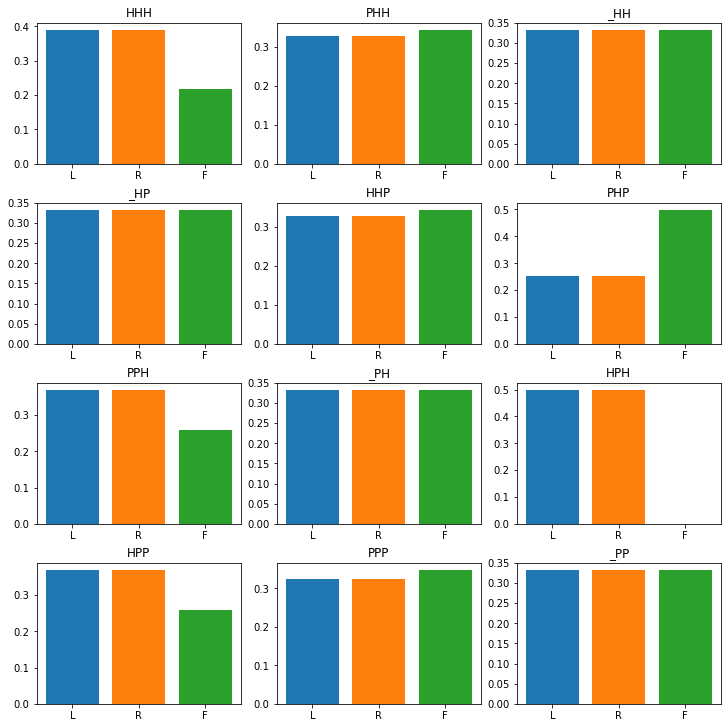

In [169]:
CASES = pd.DataFrame.from_dict(dic_cases)
fig,ax = plt.subplots(4,3,figsize=(10,10),constrained_layout=True)
for i,col in enumerate(CASES.columns):
    ax[i%4,i%3].set_title(f'{col}')
    for j,row in enumerate(CASES[col]):
        ax[i%4,i%3].bar(j,row)
    ax[i%4,i%3].set_xticks([0,1,2])
    ax[i%4,i%3].set_xticklabels(['L','R','F'])
CASES
    

In [175]:
CASES.to_pickle('probs.pkl')